In [1]:
import os,glob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

In [2]:
file_path = 'train'

In [3]:
name_class = os.listdir(file_path)
name_class

['Benign', 'false', 'Malignant']

In [4]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [5]:
filepaths

['train\\Benign\\1.jpg',
 'train\\Benign\\10.jpg',
 'train\\Benign\\100.jpg',
 'train\\Benign\\1000.jpg',
 'train\\Benign\\1001.jpg',
 'train\\Benign\\1002.jpg',
 'train\\Benign\\1003.jpg',
 'train\\Benign\\1004.jpg',
 'train\\Benign\\1005.jpg',
 'train\\Benign\\1006.jpg',
 'train\\Benign\\1007.jpg',
 'train\\Benign\\1008.jpg',
 'train\\Benign\\1009.jpg',
 'train\\Benign\\101.jpg',
 'train\\Benign\\1010.jpg',
 'train\\Benign\\1011.jpg',
 'train\\Benign\\1012.jpg',
 'train\\Benign\\1013.jpg',
 'train\\Benign\\1014.jpg',
 'train\\Benign\\1015.jpg',
 'train\\Benign\\1016.jpg',
 'train\\Benign\\1017.jpg',
 'train\\Benign\\1018.jpg',
 'train\\Benign\\1019.jpg',
 'train\\Benign\\102.jpg',
 'train\\Benign\\1020.jpg',
 'train\\Benign\\1021.jpg',
 'train\\Benign\\1022.jpg',
 'train\\Benign\\1023.jpg',
 'train\\Benign\\1024.jpg',
 'train\\Benign\\1025.jpg',
 'train\\Benign\\1026.jpg',
 'train\\Benign\\1027.jpg',
 'train\\Benign\\1028.jpg',
 'train\\Benign\\1029.jpg',
 'train\\Benign\\103.jpg',
 

In [6]:
labels=list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [7]:
labels

['Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',

In [8]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels=pd.Series(labels, name='label')
data= pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,label
0,train\Benign\2385.jpg,Benign
1,train\Benign\784.jpg,Benign
2,train\Benign\6246.jpg,Benign
3,train\Benign\6045.jpg,Benign
4,train\Benign\5412.jpg,Benign


In [9]:
train, test = train_test_split(data, test_size = 0.25, random_state = 42)

<function matplotlib.pyplot.show(close=None, block=None)>

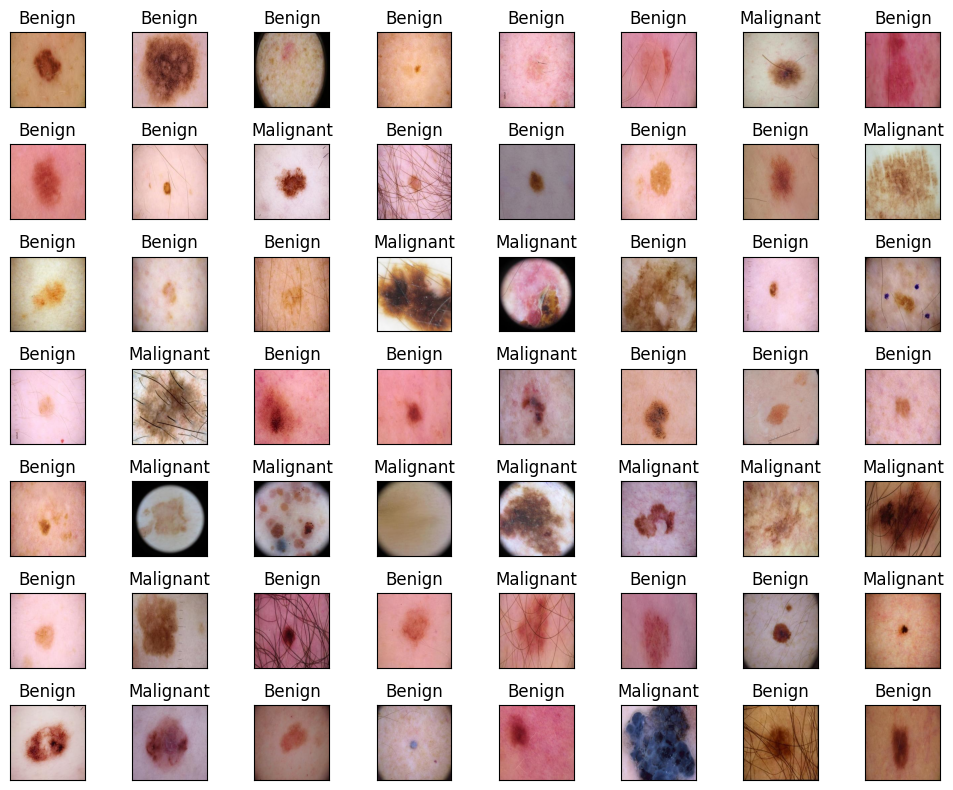

In [10]:
fig, axes = plt.subplots(nrows=7, ncols=8, figsize=(10,8), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.label[i])
plt.tight_layout()
plt.show 

In [11]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [12]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe =train,
    x_col='Filepath',
    y_col='label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
) 

valid_gen= train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen= train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
)

Found 8912 validated image filenames belonging to 3 classes.
Found 2971 validated image filenames belonging to 3 classes.
Found 2971 validated image filenames belonging to 3 classes.


In [13]:
print("Unique classes in train dataframe:", train['label'].nunique())
print("Unique classes in valid dataframe:", test['label'].nunique())
print("Unique classes in test dataframe:", test['label'].nunique())

Unique classes in train dataframe: 3
Unique classes in valid dataframe: 3
Unique classes in test dataframe: 3


In [14]:
pretrained_model = ResNet50(
    input_shape=(100,100,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [15]:
inputs=pretrained_model.input
x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)
model=Model(inputs=inputs, outputs=outputs)

In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
my_callbacks = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=100
)

In [18]:
model.save("my_model.keras")

In [19]:
history = model.fit( train_gen, validation_data=valid_gen, epochs=1)

C:\Users\mpran\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


279/279 ━━━━━━━━━━━━━━━━━━━━ 238s 808ms/step - accuracy: 0.8327 - loss: 0.3789 - val_accuracy: 0.8761 - val_loss: 0.2778


Text(0.5, 1.0, 'Loss')

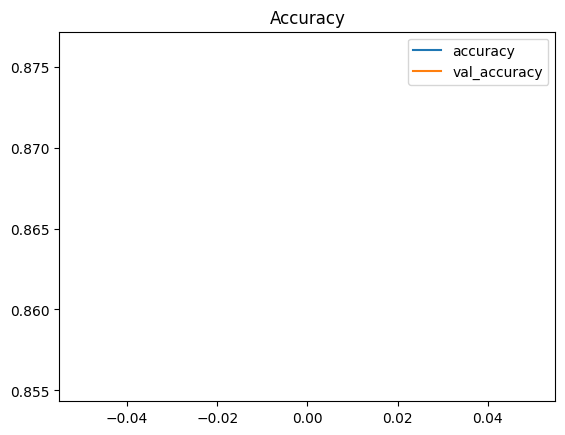

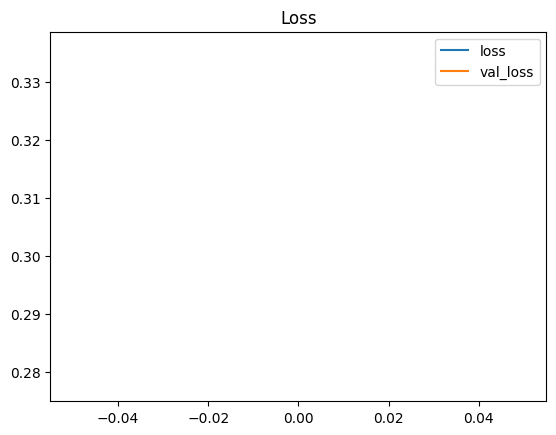

In [20]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")

In [21]:
results =  model.evaluate(test_gen, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy:{:.2f}%".format(results[1] *100))

C:\Users\mpran\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test Loss: 0.27780
Test Accuracy:87.61%


In [22]:
pred =model.predict(test_gen)
pred = np.argmax(pred,axis=1)

labels=(train_gen.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred=[labels[k] for k in pred]

93/93 ━━━━━━━━━━━━━━━━━━━━ 61s 625ms/step


In [23]:
y_test=list(test.label) 
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      Benign       0.86      0.92      0.89      1588
   Malignant       0.90      0.82      0.86      1382
       false       0.00      0.00      0.00         1

    accuracy                           0.88      2971
   macro avg       0.59      0.58      0.58      2971
weighted avg       0.88      0.88      0.88      2971



C:\Users\mpran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mpran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mpran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

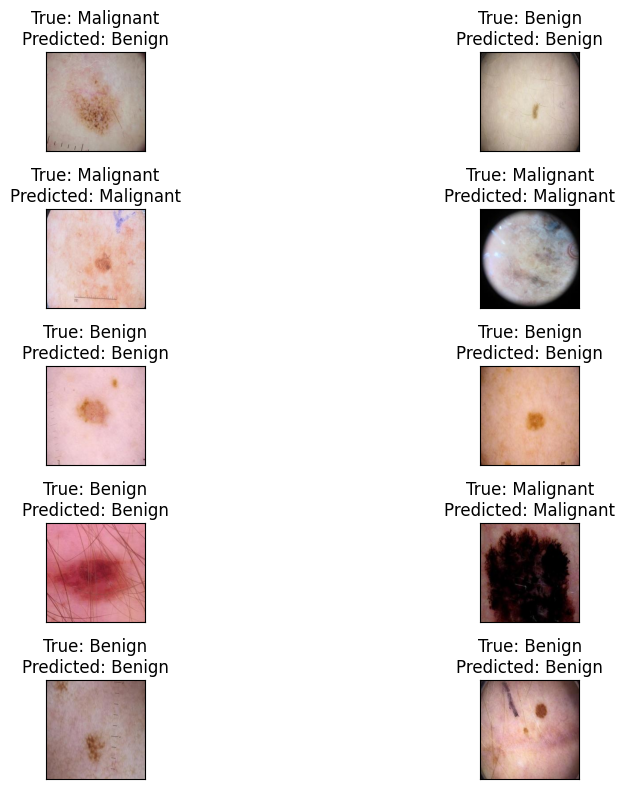

In [25]:
fig, axes=plt.subplots(nrows=5, ncols=2, figsize=(12,8),
                       subplot_kw = {'xticks' : [], 'yticks' : []})
for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [26]:
from tensorflow.keras.models import load_model
loaded_model_imageNet = load_model("my_model.keras")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

C:\Users\mpran\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 438 variables whereas the saved optimizer has 2 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[48 42  8]]


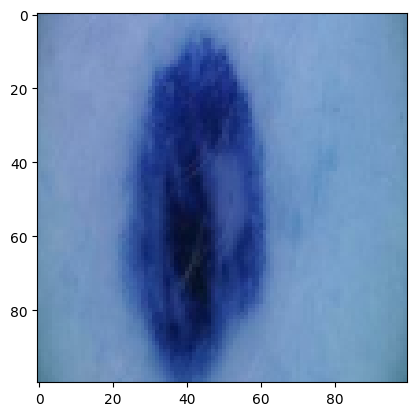

In [27]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'ben.png'
img = cv2.imread(img_path)
img = cv2.resize(img, (100,100))

x=np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = loaded_model_imageNet.predict(x)
print((result*100).astype('int'))

plt.imshow(img)

In [28]:
p = list((result*100).astype('int'))
pp=list(p[0])
print(pp)

[48, 42, 8]


In [29]:
print("Largest element is:", max(pp))

Largest element is: 48


In [30]:
index = pp.index(max(pp))

In [31]:
name_class = ['No Cancer', 'Malignant','benign']

In [32]:
name_class[index]

'No Cancer'

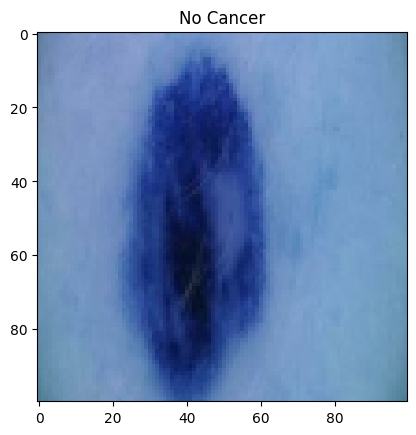

In [33]:
plt.title(name_class[index])
plt.imshow(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
[[44 24 30]]


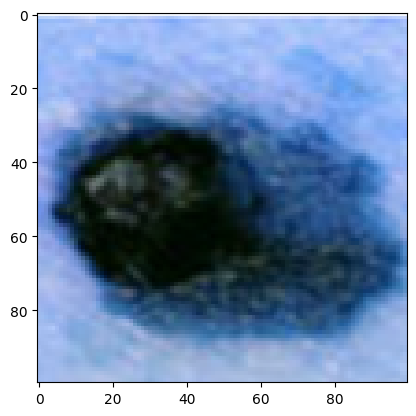

In [34]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'm2.png'
img = cv2.imread(img_path)
img = cv2.resize(img, (100,100))

x=np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = loaded_model_imageNet.predict(x)
print((result*100).astype('int'))

plt.imshow(img)

In [35]:
p = list((result*100).astype('int'))
pp=list(p[0])
print(pp)

[44, 24, 30]


In [36]:
print("Largest element is:", max(pp))

Largest element is: 44


In [37]:
index = pp.index(max(pp))

In [38]:
name_class = ['benign', 'No Cancer','Malignant']
name_class[index]

'benign'

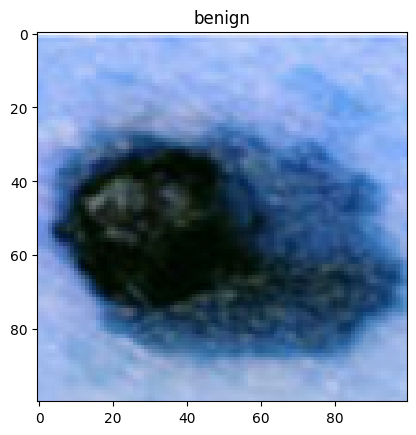

In [39]:
plt.title(name_class[index])
plt.imshow(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
[[34 46 18]]


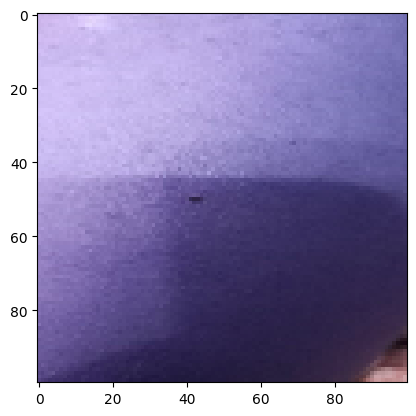

In [40]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'hr.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (100,100))

x=np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = loaded_model_imageNet.predict(x)
print((result*100).astype('int'))

plt.imshow(img) 

In [41]:
p = list((result*100).astype('int'))
pp=list(p[0])
print(pp)
print("Largest element is:", max(pp))

[34, 46, 18]
Largest element is: 46


In [42]:
index = pp.index(max(pp))

In [43]:
name_class = ['Benign', 'Malignant','No Cancer']
name_class[index]

'Malignant'

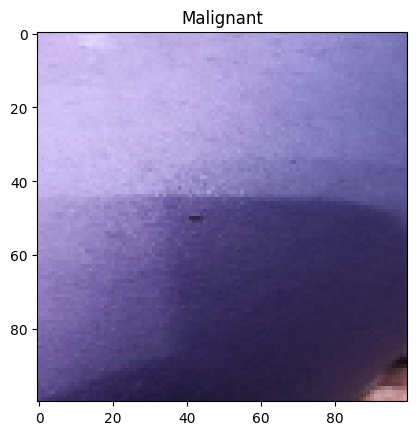

In [44]:
plt.title(name_class[index])
plt.imshow(img)